# Run Twice. Once for training and once for test
TODO: make this so the notebook only has to be run once

In [12]:
import os
# read image
from scipy.misc import imread
from scipy.misc import imresize
import numpy as np

# plotting pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import colors # making colors consistent
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar helper

In [2]:
SQUARE_DIM = 224
if SQUARE_DIM:
    IMG_WIDTH = SQUARE_DIM
    IMG_HEIGHT = SQUARE_DIM
    
CHANNELS = 3

In [10]:
# helper to add an image to the plot and choose whether
# to include the color bar
def implot(mp, ax, SHOW_CB=False):
    cmap = plt.get_cmap('viridis')
    # bounds=[-4,0,4]
    bounds=np.linspace(-0.01, 1, 80)
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # tell imshow about color map so that only set colors are used
    im = ax.imshow(mp, interpolation='nearest', origin='lower',
                        cmap=cmap, norm=norm)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    if SHOW_CB:
        if np.min(mp) != np.max(mp):
            cbar = plt.colorbar(im, cax=cax, format='%1.2f', boundaries=bounds)
        else:
            cax.set_axis_off()
    else:
        cax.set_axis_off()

    ax.set_axis_off()

def show_masked_result(image, mask):
    # create combined image of (image & mask)
    combined = np.copy(img)
    combined[mask == 0] = [0, 0, 0]

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))

    implot(image, ax1)
    implot(mask, ax2, True)
    implot(combined, ax3)

    plt.grid('off')
    plt.tight_layout()
    plt.show()

In [3]:
def show_three_images(img_rs, mask_rs, img_copy):
    fig = plt.figure()

    # show original image
    fig.add_subplot(131)
    plt.title('image')
    plt.imshow(img_rs)

    fig.add_subplot(132)
    plt.title('mask')
    plt.imshow(mask_rs)

    fig.add_subplot(133)
    plt.title('together')
    plt.imshow(img_copy)

    plt.show() 

In [4]:
root_dir = "./raw/"
raw_mask_dir = os.path.join(root_dir, "ISIC-2017_Test_V2_Part1_GroundTruth")
raw_img_dir = os.path.join(root_dir, "ISIC-2017_Test_V2_Data")

In [5]:
mask_ext = "_segmentation.png"
img_ext = ".jpg"
list_of_mask_file_names = os.listdir(raw_mask_dir)
list_of_img_ids = [name.rstrip(mask_ext) for name in list_of_mask_file_names]
list_of_img_file_names = [name+img_ext for name in list_of_img_ids]
print(len(list_of_mask_file_names), len(list_of_img_ids), len(list_of_img_file_names))
print(list_of_mask_file_names[42], list_of_img_ids[42], list_of_img_file_names[42])
total_instances_n = len(list_of_mask_file_names)

600 600 600
ISIC_0015986_segmentation.png ISIC_0015986 ISIC_0015986.jpg


/home/jack/anaconda3/envs/dl_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/jack/anaconda3/envs/dl_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
/home/jack/anaconda3/envs/dl_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/jack/anaconda3/envs/dl_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.

0


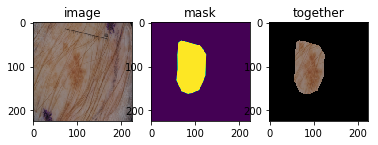

20
40
60
80
100
120
140
160
180
200


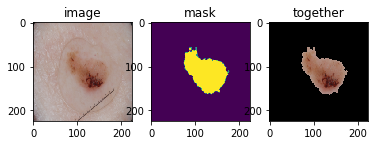

220
240
260
280
300
320
340
360
380
400


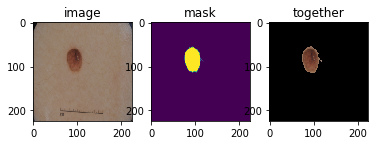

420
440
460
480
500
520
540
560
580


In [6]:
final_imgs = np.zeros((total_instances_n, IMG_WIDTH, IMG_HEIGHT, CHANNELS), dtype='float32')
final_masks = np.zeros((total_instances_n, IMG_WIDTH, IMG_HEIGHT), dtype='float32')
for i, img_id in enumerate(list_of_img_ids):
    img = imread(os.path.join(raw_img_dir, list_of_img_file_names[i]))
    mask = imread(os.path.join(raw_mask_dir, list_of_mask_file_names[i]))
    img_rs = imresize(img, (224,224))
    mask_rs = imresize(mask, (224,224))
    img_copy = np.copy(img_rs)
    img_copy[mask_rs == 0] = [0, 0, 0]
    final_imgs[i] = img_rs
    final_masks[i] = mask_rs
    if i %20 == 0:
        print(i)
    if i % 200 == 0:
        show_three_images(img_rs, mask_rs, img_copy)

In [7]:
# preprocess mask (example shown in other notebook - TODO)
# threshold (clip) to [0, 1] where 0:no mask, 1:mask
# convert to datatype int
y_dev = [np.clip(img, 0, 1).astype(np.int32) for img in final_masks]
y_dev = np.asarray(y_dev)

In [8]:
# preprocess image (example shown in other notebook - TODO)
X_dev = [(image-np.amin(image))/(np.amax(image)-np.amin(image)) for image in final_imgs]
X_dev = np.asarray(X_dev)

/home/jack/anaconda3/envs/dl_cpu/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


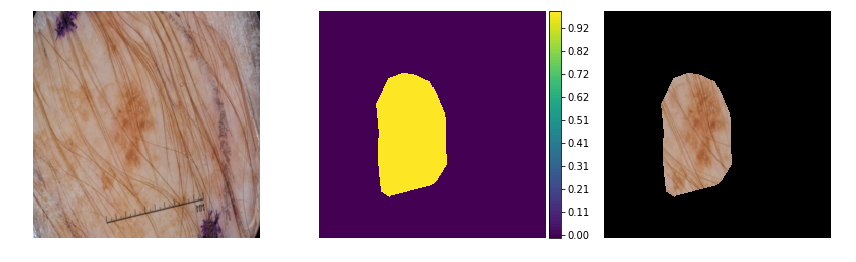

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


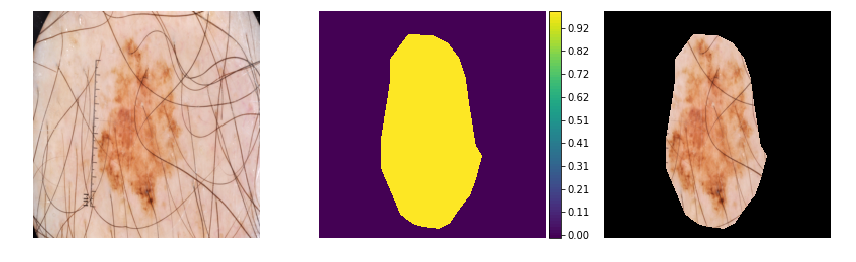

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


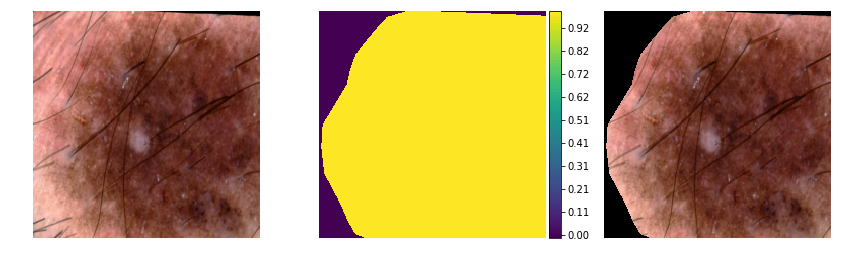

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
for i in range(3):
    img = X_dev[i,:,:]
    mask = y_dev[i,:,:]
    show_masked_result(img, mask)
    print(mask)

In [14]:
## save image
np.save('./numpy_final/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM) +  '/test.npy', X_dev)
np.save('./numpy_final/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM) + '/test_masks.npy', y_dev)